In [28]:
#neccesory lib's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train = pd.read_csv("/content/drive/MyDrive/Projects/datasets/train.csv")  # corrected path
test = pd.read_csv("/content/drive/MyDrive/Projects/datasets/test.csv")  # corrected path


Mounted at /content/drive


In [30]:
#basic info about train dataset
print(train.head())
print(train.info())
print(train.describe())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [31]:
train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [38]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    train[col] = train[col].fillna(train[col].median())

In [39]:
cat_cols = train.select_dtypes(include=["object"]).columns

for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])

In [40]:
train["TotalBathrooms"] = 0
if "FullBath" in train.columns and "HalfBath" in train.columns:
    train["TotalBathrooms"] = train["FullBath"] + train["HalfBath"]

if "YearBuilt" in train.columns:
    train["HouseAge"] = 2024 - train["YearBuilt"]

porch_cols = [col for col in ["OpenPorchSF", "EnclosedPorch", "DeckSF", "ScreenPorch"]
              if col in train.columns]

train["TotalPorchArea"] = train[porch_cols].sum(axis=1) if porch_cols else 0

In [41]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBathrooms,HouseAge,TotalPorchArea
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,2,2008,WD,Normal,208500,3,21,61
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Shed,0,5,2007,WD,Normal,181500,2,48,0
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,9,2008,WD,Normal,223500,3,23,42
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,2,2006,WD,Abnorml,140000,1,109,307
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Shed,0,12,2008,WD,Normal,250000,3,24,84


In [42]:
if "Id" in train.columns:
  train.drop(columns=["Id"], inplace=True)



train = pd.get_dummies(train, drop_first=True)

In [43]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [53]:
models = {
"Linear Regression": LinearRegression(),
"Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
"Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


results = {}

In [54]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  results[name] = rmse
  print(f"{name} RMSE: {rmse}")

Linear Regression RMSE: 51392.658758172
Random Forest RMSE: 28493.25930254857
Gradient Boosting RMSE: 27723.866570129278


In [56]:
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)


importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]


print("Top 10 Important Features:")
for i in indices:
  print(X.columns[i], ":", importances[i])

Top 10 Important Features:
HouseAge : 0.011732812876927465
GarageFinish_Unf : 0.015115035758640956
LotArea : 0.01561593895664698
2ndFlrSF : 0.026186304203681583
BsmtFinSF1 : 0.03081883349239605
1stFlrSF : 0.03184842906452864
GarageCars : 0.0476310735066667
TotalBsmtSF : 0.047935655232566994
GrLivArea : 0.15472259297414995
OverallQual : 0.5145857794495264


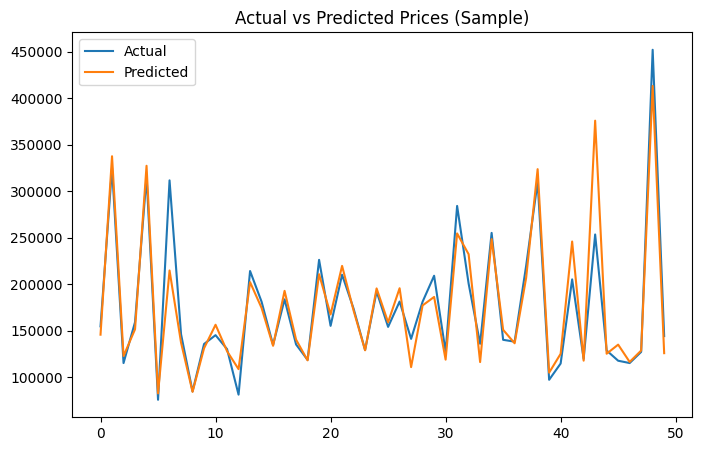

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(y_test.values[:50], label="Actual")
plt.plot(best_model.predict(X_test_scaled)[:50], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Prices (Sample)")
plt.show()

In [58]:
best_rmse = results[min(results, key=results.get)]
print("Best Model:", min(results, key=results.get))
print("Best RMSE:", min(results.values()))


Best Model: Gradient Boosting
Best RMSE: 27723.866570129278
